## Developed notebook for applying cross-correlation technique at low latitudes. Here we will study the Carajas area, located at Para, North, Brazil.

In [1]:
# Import packages
import numpy
import scipy
import pandas
from matplotlib import pyplot
from scipy.interpolate import griddata
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.basemap import Basemap

## Part 1 - Reading the file and analyzing it

In [2]:
# There are six channels and a tab delimitation. Besides we have to skip one single row.
X, Y, Long, Lat, Tf, F = numpy.loadtxt('real_data/carajas/projeto1051-carajas.XYZ', 
                                       skiprows=1, usecols=(0,1,2,3,4,5), unpack = True)

In [3]:
# Define the area
geografic_area = (Long.min(), Long.max(), Lat.min(), Lat.max())
projected_area = (X.min(), X.max(), Y.min(), Y.max())

In [4]:
print 'Study area (degrees):', numpy.round(geografic_area, decimals = 3)
print 
print 'Study area (meters):', numpy.round(projected_area, decimals = 2)

Study area (degrees): [-51.815 -49.475  -4.03   -2.921]

Study area (meters): [ 409432.  669346. 9554600. 9677098.]


In [5]:
# Define the minimum and maximum values
longmin = numpy.round(Long.min(), decimals = 2)
longmax = numpy.round(Long.max(), decimals = 2)
latmin = numpy.round(Lat.min(), decimals = 2)
latmax = numpy.round(Lat.max(), decimals = 2)

In [6]:
# Analysing the total field anomaly data
print 'Total field anomaly data:'
print 'Min:', Tf.min()
print 'Max:', Tf.max()

Total field anomaly data:
Min: -4230.0
Max: 878.0


In [7]:
# Analysing the total field intensity data
print 'Total field anomaly data:'
print 'Min:', F.min()
print 'Max:', F.max()

Total field anomaly data:
Min: 23037.0
Max: 28142.0


## Part 2 - Scattering all points

pyplot.close('all')
figure1 = pyplot.figure(figsize=(8,8))

p1 = pyplot.scatter(Long, Lat, s = 1., c = Tf, marker = '.', cmap = pyplot.cm.jet)
cbar1 = pyplot.colorbar(p1, aspect = 30, fraction = 0.03, orientation = 'vertical')
cbar1.set_label('Total field anomaly (nT)',fontsize = 15, rotation = -90, labelpad = 20)
cbar1.set_ticks(numpy.linspace(Tf.min(), Tf.max(), 8))
cbar1.set_clim(Tf.min(), Tf.max())

pyplot.title('Flight lines of aeromagnetic survey',fontsize = 16, pad = 10)
pyplot.xlabel('Longitude ($^o$)', fontsize = 15)
pyplot.ylabel('Latitude ($^o$)', fontsize = 15)
pyplot.xlim(longmin, longmax)
pyplot.ylim(latmin, latmax)
pyplot.xticks(numpy.linspace(longmin, longmax, 5), fontsize = 12)
pyplot.yticks(numpy.linspace(latmin, latmax, 5), fontsize = 12)

pyplot.savefig('figure01-flight-lines.png', dpi = 300, transparence = True, bbox_inches = 'tight')
pyplot.savefig('figure01-flight-lines.pdf', dpi = 300, transparence = True, bbox_inches = 'tight')
pyplot.show()

pyplot.close('all')
figure2 = pyplot.figure(figsize=(8,8))

p2 = pyplot.scatter(Long, Lat, s = 1., c = F, marker = '.', cmap = pyplot.cm.rainbow)
cbar2 = pyplot.colorbar(p2, aspect = 30, fraction = 0.03, orientation = 'vertical')
cbar2.set_label('Magnetic field intensity (nT)', fontsize = 15, rotation = -90, labelpad = 20)
cbar2.set_ticks(numpy.linspace(F.min(), F.max(), 8))
cbar2.set_clim(F.min(), F.max())

pyplot.title('Flight lines of aeromagnetic survey',fontsize = 16, pad = 10)
pyplot.xlabel('Longitude ($^o$)', fontsize = 15)
pyplot.ylabel('Latitude ($^o$)', fontsize = 15)
pyplot.xlim(longmin, longmax)
pyplot.ylim(latmin, latmax)
pyplot.xticks(numpy.linspace(longmin, longmax, 5), fontsize = 12)
pyplot.yticks(numpy.linspace(latmin, latmax, 5), fontsize = 12)

pyplot.savefig('figure02-flight-lines.png', dpi = 300, transparence = True, bbox_inches = 'tight')
pyplot.savefig('figure02-flight-lines.pdf', dpi = 300, transparence = True, bbox_inches = 'tight')
pyplot.show()

## Part 2 - Interpolate the data and drawing the basemap

In [8]:
# Define number of points and shape
num = 250
longitude = numpy.linspace(longmin, longmax, num)
latitude = numpy.linspace(latmin, latmax, num)

In [9]:
# Creates the grid
gridlong, gridlat = numpy.meshgrid(longitude, latitude)

In [10]:
# Create the tuples
flightcoordinates = (Long, Lat)
gridcoordinates = (gridlong, gridlat)

In [11]:
# Interpolate the total field anomaly data and also the magnetic field intensity
Tfi = griddata(flightcoordinates, Tf, gridcoordinates, method = 'cubic')
Fi = griddata(flightcoordinates, F, gridcoordinates, method = 'cubic')

In [12]:
# Setting values for colorbar:
vtfmin = Tf.min()
vtfmax = Tf.max()
vfmin = F.min()
vfmax = F.max()

# Visualyzing the interpolated datapyplot
pyplot.close('all')
fig04 = pyplot.figure(figsize=(8,8))
# Plot for interpolated total field anomaly
image3a = pyplot.contourf(gridlong, gridlat, Tfi, 50, vmin = vtfmin, vmax = vtfmax, cmap = pyplot.cm.RdBu_r)
cbar3a = pyplot.colorbar(image3a, aspect = 60, fraction = 0.1, orientation = 'horizontal')
cbar3a.set_label('nT', fontsize = 14, rotation = 0, labelpad = 10)
cbar3a.set_ticks(numpy.linspace(vtfmin, vtfmax, 8))
cbar3a.set_clim(vtfmin, vtfmax)
# If you want to plot the magnetic intensity, comment the plot above
#image3b = pyplot.contourf(longitude, latitude, Fi, 50, vmin = vfmin, vmax = vfmax, cmap = pyplot.cm.rainbow)
#cbar3b = pyplot.colorbar(image3b, aspect = 60, fraction = 0.1, orientation = 'vertical')
#cbar3b.set_label('nanoTesla (nT)', fontsize = 14, rotation = 90)
#cbar3b.set_ticks(numpy.linspace(vfmin, vfmax, 8))
#cbar3b.set_clim(vfmin, vfmax)
#pyplot.plot(Long, Lat, 'k.', markersize = 0.01, label = 'Flight lines')
#pyplot.title('Magnetic field intensity', fontsize = 14)
#pyplot.title('Magnetic total field anomaly (nT)', fontsize = 18)
pyplot.xlabel('Longitude ($^o$)', fontsize = 15)
pyplot.ylabel('Latitude ($^o$)', fontsize = 15)
pyplot.xlim(longmin, longmax)
pyplot.ylim(latmin, latmax)
pyplot.xticks(numpy.linspace(longmin, longmax, 5), fontsize = 12)
pyplot.yticks(numpy.linspace(latmin, latmax, 5), fontsize = 12)

#pyplot.savefig('figure03-interpolated-data.png', dpi = 600, transparent = True, bbox_inches = 'tight')
#pyplot.savefig('figure03-interpolated-data.pdf', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.show()

In [13]:
# Setting the central values
long0 = 0.5*(longmin + longmax)
lat0 = 0.5*(latmin + latmax)

In [14]:
# Creating the bsaemap location
map1 = Basemap(llcrnrlon = longmin - 1.5, llcrnrlat = latmin - 1.5,
               urcrnrlon = longmax + 1.5, urcrnrlat = latmax + 1.5, 
               resolution = 'f', projection = 'tmerc', 
               lon_0 = long0, lat_0 = lat0, epsg = 3395)

In [15]:
# Define meridians and parallels
meridians = numpy.linspace(0., 360., 361)
parallels = numpy.linspace(-90., 90., 181)

# Plotting the location map
pyplot.close('all')
pyplot.figure(figsize=(14,12))
map1.arcgisimage(service='NatGeo_World_Map', xpixels = 1000, ypixels = 1000, verbose= True)
map1.drawmeridians(meridians, labels=[1, 0, 0, 1], fontsize = 14)
map1.drawparallels(parallels, labels=[1, 0, 0, 1], fontsize = 14)
map1.drawmapscale(-52., -5.3, longmax, latmax, 200, barstyle = 'fancy')
map1.plot((longmin, longmin, longmax, longmax, longmin), (latmin, latmax, latmax, latmin, latmin), 
          'k--', linewidth = 1.5, label = 'Study area', latlon = True)
pyplot.xlabel('Longitude $(^o)$', fontsize = 18, labelpad = 25)
pyplot.ylabel('Latitude $(^o)$', fontsize = 18, labelpad = 35)
pyplot.legend(loc = 'upper left', fontsize = 'x-large')
#pyplot.savefig('figure04-location.png', dpi = 600, transparent = True, bbox_inches = 'tight')
#pyplot.savefig('figure04-location.pdf', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.show()

# Plotting the location map
pyplot.close('all')
pyplot.figure(figsize=(14,12))
map1.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1000, ypixels = 1000, verbose= True)
map1.drawmeridians(meridians, labels=[1, 0, 0, 1], fontsize = 14)
map1.drawparallels(parallels, labels=[1, 0, 0, 1], fontsize = 14)
#map1.readshapefile('Para_Municipios/Para_Municipios', 'Para_Municipios', 
#                   drawbounds = True, linewidth = 1., color = 'k')
map1.drawmapscale(-52., -5.3, longmax, latmax, 200, barstyle = 'fancy')
map1.plot((longmin, longmin, longmax, longmax, longmin), (latmin, latmax, latmax, latmin, latmin), 
          'k--', linewidth = 1.5, label = 'Study area', latlon = True)
pyplot.legend(loc = 'upper left', fontsize = 'x-large')
pyplot.xlabel('Longitude $(^o)$', fontsize = 18, labelpad = 25)
pyplot.ylabel('Latitude $(^o)$', fontsize = 18, labelpad = 35)
#pyplot.savefig('figure04-location(1).png', dpi = 600, transparent = True, bbox_inches = 'tight')
#pyplot.savefig('figure04-location(1).pdf', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.show()

# Plotting the location map
pyplot.close('all')
pyplot.figure(figsize=(12,12))
map1.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1000, ypixels = 1000, verbose= True)
map1.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize = 14, dashes = [1,1])
map1.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize = 14, dashes = [1,1])
map1.drawmapscale(-52., -5.3, longmax, latmax, 200, barstyle = 'fancy')
cs = map1.contourf(gridlong, gridlat, Tfi, 50, cmap = pyplot.cm.RdBu_r, latlon = True, alpha = 1.)
cbar = map1.colorbar(cs, location = 'bottom', size= '3%', pad = '12%')
cbar.set_label('nT', fontsize = 14, rotation = 0, labelpad = 5)
cbar.set_ticks(numpy.linspace(vtfmin, vtfmax, 8))
cbar.set_clim(vtfmin, vtfmax)
#pyplot.title('Observed magnetic total field anomaly (nT)', fontsize = 18, pad = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 18, labelpad = 25)
pyplot.ylabel('Latitude $(^o)$', fontsize = 18, labelpad = 35)
#pyplot.savefig('figure05-location-anomaly.png', dpi = 600, transparent = True, bbox_inches = 'tight')
#pyplot.savefig('figure05-location-anomaly.pdf', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.show()

In [16]:
# Creating the bsaemap location
#map2 = Basemap(llcrnrlon = longmin, llcrnrlat = latmin,
#               urcrnrlon = longmax, urcrnrlat = latmax, 
#               resolution = 'f', projection = 'tmerc', 
#               lon_0 = long0, lat_0 = lat0, epsg = 3395)

map2 = Basemap(llcrnrlon = -51.5, llcrnrlat = latmin,
               urcrnrlon = -50., urcrnrlat = latmax, 
               resolution = 'f', projection = 'tmerc', 
               lon_0 = long0, lat_0 = lat0, epsg = 3395)

In [17]:
# Define meridians and parallels
meridians2 = numpy.linspace(0., 360., 721)
parallels2 = numpy.linspace(-90., 90., 361)

# Plotting the location map
pyplot.close('all')
pyplot.figure(figsize=(10, 10))
#map2.arcgisimage(service='World_Imagery', xpixels = 1000, ypixels = 1000, verbose= True)
#map2.drawcoastlines(linewidth = 1., color = 'k')
#map2.drawcountries(linewidth = 1., color = 'k')
#map2.drawrivers(linewidth = 1., color = 'b')
map2.readshapefile('Para_Municipios/Para_Municipios', 'Para_Municipios', 
                   drawbounds = True, linewidth = 0.2, color = 'k')
map2.drawmeridians(meridians2, labels=[1, 0, 0, 1], fontsize = 14)
map2.drawparallels(parallels2, labels=[1, 0, 0, 1], fontsize = 14)
map2.drawmapscale(-50.25, -3.95, longmax, latmax, 50, barstyle = 'fancy')
cs2 = map2.contourf(gridlong, gridlat, Tfi, 50, cmap = pyplot.cm.RdBu_r, latlon = True, alpha = 1.)
cbar = map2.colorbar(cs2, location = 'bottom', size = '4%', pad = '12%')
cbar.set_label('nT', fontsize = 14, rotation = 0, labelpad = 5)
cbar.set_ticks(numpy.linspace(vtfmin, vtfmax, 8))
cbar.set_clim(vtfmin, vtfmax)
#pyplot.title('Observed magnetic total field anomaly (nT)', fontsize = 18)
pyplot.xlabel('Longitude $(^o)$', fontsize = 14, labelpad = 25)
pyplot.ylabel('Latitude $(^o)$', fontsize = 14, labelpad = 45)
pyplot.savefig('figure06-anomaly.png', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.savefig('figure06-anomaly.pdf', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.show()

## Part 3 - Interpolation to apply cross-correlation

In [18]:
# Import usefull libraries
from utm import from_latlon
from codes.grids import regular_grid
from codes.statistical import cccoef
from codes.filtering import reduction, continuation
from codes.derivative import totalgrad, zderiv
# Modules for equivalent layer
from codes.equivalentlayer import layer, fit_layer, rtp_layer

Here we will work with projected coordinates 

In [19]:
# Find the utm zone of all data:
pp = []
for k in range(Long.size):
    l = from_latlon(Lat[k], Long[k])
    pp.append(l[2])

In [20]:
# Show the zone number
numpy.min(pp), numpy.max(pp)

(22, 22)

In [23]:
# Select our study area
#cornerxmin = (Long.any() <= -50.75 and Long.any() >= -51.)
#cornerxmax = Long >= -51.
#cornerymin = Lat <= -3.
#cornerymax = Lat >= -3.25

In [24]:
# Define the grid informations
shape = (40, 40)
h = -50.

In [25]:
# Create the grid
long0, lati0, zo = regular_grid((-51., -50.7, -3.3, -3.), shape, h)

In [26]:
# Create the empty list
xo = []
yo = []

In [27]:
# Convert to UTM
for k in range(long0.size):
    xy = from_latlon(lati0[k], long0[k], force_zone_number = 22)
    xo.append(xy[0])
    yo.append(xy[1])

In [28]:
# Convert as array
xo = numpy.array(xo)
yo = numpy.array(yo)

In [29]:
# New total field anomaly data
tf = griddata((X, Y), Tf, (xo, yo), method = 'cubic', fill_value = 0.)

In [30]:
# New central points
newlong0 = 0.5*(long0.min() + long0.max())
newlati0 = 0.5*(lati0.min() + lati0.max())

In [31]:
# Define the new basemap
# Creating the bsaemap location
map3 = Basemap(llcrnrlon = long0.min(), llcrnrlat = lati0.min(),
               urcrnrlon = long0.max(), urcrnrlat = lati0.max(), 
               resolution = 'f', projection = 'tmerc', 
               lon_0 = newlong0, lat_0 = newlati0, epsg = 3395)

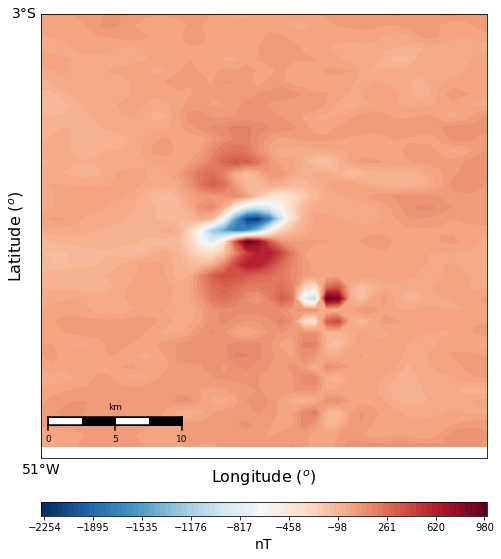

In [32]:
# Plotting the location map
pyplot.close('all')
pyplot.figure(figsize=(8, 10))

map3.drawmeridians(meridians2, labels=[1, 0, 0, 1], fontsize = 14)
map3.drawparallels(parallels2, labels=[1, 0, 0, 1], fontsize = 14)
map3.drawmapscale(-50.95, -3.275, newlong0.max(), newlati0.max(), 10, barstyle = 'fancy')
cs2 = map3.contourf(long0.reshape(shape), lati0.reshape(shape), tf.reshape(shape), 100, 
                    cmap = pyplot.cm.RdBu_r, latlon = True, alpha = 1.)
cbar = map3.colorbar(cs2, location = 'bottom', size = '3%', pad = '10%')
cbar.set_label('nT', fontsize = 14, rotation = 0, labelpad = 5)
cbar.set_ticks(numpy.linspace(tf.min(), tf.max(), 10))
cbar.set_clim(tf.min(), tf.max())

#pyplot.suptitle('Observed magnetic total field anomaly (nT)', fontsize = 18, y = 0.82)
pyplot.xlabel('Longitude $(^o)$', fontsize = 16, labelpad = 10)
pyplot.ylabel('Latitude $(^o)$', fontsize = 16, labelpad = 15)

#pyplot.savefig('figure06(a)-anomaly.png', dpi = 600, transparent = True, bbox_inches = 'tight')
#pyplot.savefig('figure06(a)-anomaly.pdf', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.show()

For the equivalent layer - vectors: $\left[\bar{xo}, \bar{yo}, \bar{zo}, \bar{tf} \right]$

For the reduction filter - matrixs: $\left[\mathbf{X_o}, \mathbf{Y_o},  \mathbf{Z_o}, \mathbf{TF_o} \right]$

In [33]:
# Reshape the data
Xo = xo.reshape(shape)
Yo = yo.reshape(shape)
Zo = zo.reshape(shape)
TF = tf.reshape(shape)

In [34]:
#UP = continuation(Yo, Xo, TF, 600.)

# Plotting the location map
pyplot.close('all')
pyplot.figure(figsize=(8, 10))

map3.drawmeridians(meridians2, labels=[1, 0, 0, 1], fontsize = 14)
map3.drawparallels(parallels2, labels=[1, 0, 0, 1], fontsize = 14)
map3.drawmapscale(-50.95, -3.275, newlong0.max(), newlati0.max(), 10, barstyle = 'fancy')
cs2 = map3.contourf(long0.reshape(shape), lati0.reshape(shape), UP, 100, 
                    cmap = pyplot.cm.RdBu_r, latlon = True, alpha = 1.)
cbar = map3.colorbar(cs2, location = 'bottom', size = '3%', pad = '10%')
cbar.set_label('nT', fontsize = 14, rotation = 0, labelpad = 5)
cbar.set_ticks(numpy.linspace(tf.min(), tf.max(), 10))
cbar.set_clim(tf.min(), tf.max())

#pyplot.suptitle('Observed magnetic total field anomaly (nT)', fontsize = 18, y = 0.82)
pyplot.xlabel('Longitude $(^o)$', fontsize = 16, labelpad = 10)
pyplot.ylabel('Latitude $(^o)$', fontsize = 16, labelpad = 15)

#pyplot.savefig('figure06(a)-anomaly.png', dpi = 600, transparent = True, bbox_inches = 'tight')
#pyplot.savefig('figure06(a)-anomaly.pdf', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.show()

In [35]:
# Loading the magnetic inclination and declination from IGRF
inclination = numpy.loadtxt('real_data/carajas/inclination-carajas.csv', delimiter = ',', usecols=(4))
declination = numpy.loadtxt('real_data/carajas/declination-carajas.csv', delimiter = ',', usecols=(4))
magfield = numpy.loadtxt('real_data/carajas/intensity-carajas.csv', delimiter = ',', usecols=(4))

In [36]:
# Set the inclination and declination values
incf = inclination.mean()
decf = declination.mean()
field = magfield.mean()

In [37]:
print 'Inclination:', incf
print 'Declination:', decf
print 'Magnetic field:', field

Inclination: 7.972215119318182
Declination: -17.297072164772725
Magnetic field: 27279.4775


In [40]:
import time
inicial = time.time()
shapes = numpy.arange(5, 60 + 5, 5)
area_layer = (yo.min(), yo.max(), xo.min(), xo.max())
level = 1200
data = [yo, xo, zo, tf]
residuo = []
tempo = []
for i in range(shapes.size):
    ii = time.time()
    camada = layer(area_layer, (shapes[i], shapes[i]), level)
    _, pp = fit_layer(data, shape, camada, (shapes[i], shapes[i]), 0.01, incf, decf)
    residuo.append(numpy.sum((tf - pp)**2))
    ff = time.time()
    tempo.append(ff - ii)
print time.time() - inicial 

19.5629818439


#%matplotlib notebook
pyplot.figure(figsize=(10, 6))
pyplot.plot(shapes, residuo, 'k-', linewidth = 2.)
#pyplot.plot(shapes**2, residuo, 'bo', markersize = 10.)
#pyplot.plot(shapes[2]**2, residuo[2], 'ro', markersize = 20.)
pyplot.xlabel('Number of sources in $x$ and $y$', fontsize = 16, labelpad = 15)
pyplot.ylabel('Residual (nT)', fontsize = 16, labelpad = 15)
#pyplot.xticks(labelx**2, fontsize = 14)
pyplot.yticks(fontsize = 14)
pyplot.grid(linewidth = 0.75)

#pyplot.savefig('layer-fig01.png', dpi = 300, transparent = True, bbox_inches = 'tight')
#pyplot.savefig('layer-fig01.pdf', dpi = 300, transparent = True, bbox_inches = 'tight')
pyplot.show()

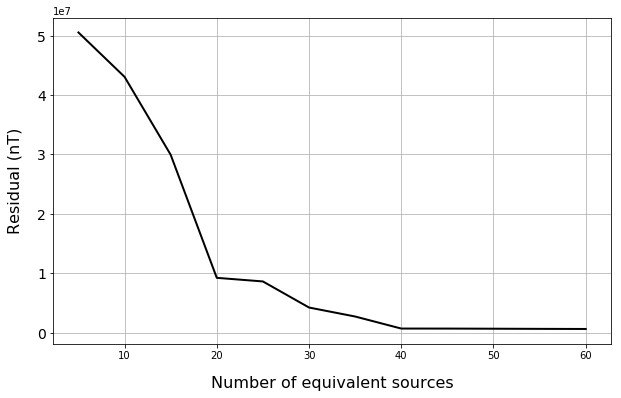

In [41]:
#%matplotlib notebook
pyplot.figure(figsize=(10, 6))
pyplot.plot(shapes, residuo, 'k-', linewidth = 2.)
#pyplot.plot(shapes**2, residuo, 'bo', markersize = 10.)
#pyplot.plot(shapes[2]**2, residuo[2], 'ro', markersize = 20.)
pyplot.xlabel('Number of equivalent sources', fontsize = 16, labelpad = 15)
pyplot.ylabel('Residual (nT)', fontsize = 16, labelpad = 15)
#pyplot.xticks(labelx**2, fontsize = 14)
pyplot.yticks(fontsize = 14)
pyplot.grid(linewidth = 0.75)

#pyplot.savefig('layer-fig01.png', dpi = 300, transparent = True, bbox_inches = 'tight')
#pyplot.savefig('layer-fig01.pdf', dpi = 300, transparent = True, bbox_inches = 'tight')
pyplot.show()

# Cross-correlation

In [42]:
# Create the equivalent layer
#areal = (xo.min() + 7000., 
#         xo.max() - 4000., 
#         yo.min() + 4000., 
#         yo.max() - 9000.)
areal = (yo.min(), yo.max(), xo.min(), xo.max())
shapel = (15, 15)
level = 1500.
EQL = layer(areal, shapel, level)

In [43]:
# Define the data
datalayer = [yo, xo, zo, tf]
#datalayer = [yo, xo, zo, UP.reshape(UP.size)]

In [44]:
#qpo, pred = fit_layer(datalayer, shape, EQL, shapel, 0.04, incf, decf)
#pyplot.contourf(xo.reshape(shape), yo.reshape(shape), (pred - tf).reshape(shape), 100, cmap = 'jet')
#pyplot.colorbar()

In [76]:
# Create the inclination and declination grids
#inc, dec = regular_grid((-90., 90., -90., 90.), (37, 31))
I = numpy.linspace(-90., 90., 37)
D = numpy.linspace(-90., 90., 19)
dec, inc = numpy.meshgrid(D, I)

In [49]:
# Create the zero-array to allocate the results
res =  numpy.zeros_like(dec)

In [50]:
# Import the time computation:
from time import time

In [51]:
# Compute the cros-correlation
# Initial time
time1 = time()
for cols, d in enumerate(D):
    for rows, i in enumerate(I):
        if i >= -15. or i <= 15.:
            rtpdata = rtp_layer(datalayer, shape, EQL, shapel, 0.01, incf, decf, i, d)
            res[rows, cols] = cccoef(totalgrad(Yo, Xo, rtpdata),
                                     zderiv(Yo, Xo, rtpdata))
        else:
            rtpdata = reduction(Yo, Xo, TF, incf, decf, i, d)
            res[rows, cols] = cccoef(totalgrad(Yo, Xo, rtpdata),
                                     zderiv(Yo, Xo, rtpdata))
# Final time
time2 = time()

In [53]:
# Show computation time
print 'Computation time (sec): %.3f' % (time2 - time1)

Computation time (sec): 357.494


In [54]:
# Analysing the positive coefficients
print 'Full cross correlation:'
print 'Minimun:', res.min()
print 'Maximun:', res.max()

Full cross correlation:
Minimun: -0.22358013129137538
Maximun: 0.4021268091436142


In [55]:
# Search for the maximum and minimum pair of inclination and declination
imax, jmax = numpy.where(res == res.max())
imin, jmin = numpy.where(res == res.min())
incmax = float(inc[imax, jmax])
decmax = float(dec[imax, jmax])
incmin = float(inc[imin, jmin])
decmin = float(dec[imin, jmin])
print '(I,D) for maximum coefficient'
print 'Inclination:', incmax
print 'Declination:', decmax

(I,D) for maximum coefficient
Inclination: 20.0
Declination: -10.0


/home/nielsendelimar/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)


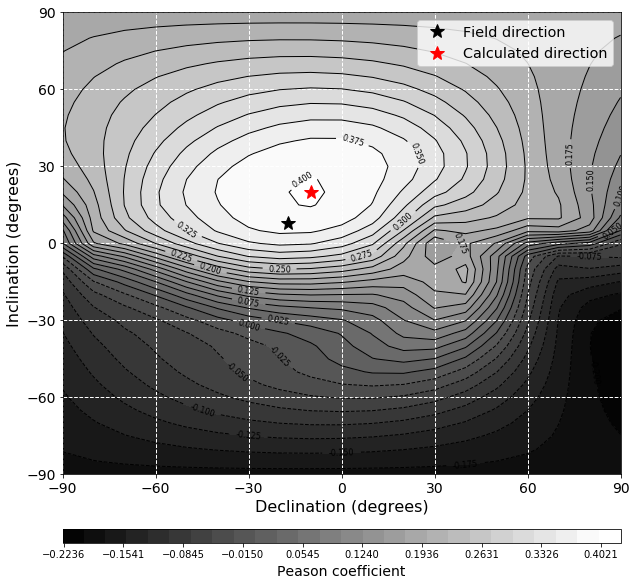

In [56]:
# Plotting the cross correlation results
pyplot.figure(figsize=(10, 10))
# Line contour
c1 = pyplot.contour(dec, inc, res, 25, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.clabel(c1, fontsize = 8)
# Map contour and colorbar
c2 = pyplot.contourf(dec, inc, res, 25, vmin = res.min(), vmax = res.max(), cmap = pyplot.cm.gray)
cbar2 = pyplot.colorbar(c2, aspect = 40, fraction = 0.05, orientation = 'horizontal', pad = 0.1)
cbar2.set_label('Peason coefficient', fontsize = 14, rotation = 0, labelpad = 5)
cbar2.set_ticks(numpy.linspace(res.min(), res.max(), 10))
cbar2.set_clim(res.min(), res.max())
# Plot configuration
pyplot.plot(decf, incf, 'k*', label = 'Field direction', markersize = 14)
pyplot.plot(decmax, incmax, 'r*', label = 'Calculated direction', markersize = 14)
#pyplot.title('Distribution of cross-correlation coefficients', fontsize = 18)
pyplot.xlabel('Declination (degrees)', fontsize = 16)
pyplot.ylabel('Inclination (degrees)', fontsize = 16)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 14)
pyplot.legend(loc = 'best', fontsize = 'x-large')

pyplot.grid(color = 'w', linestyle = '--', linewidth = 1.)

pyplot.savefig('figure07-correlation.png', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.savefig('figure07-correlation.pdf', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.show()

In [57]:
# Create the new grids to interpolate
area2interp = (I.min(), I.max(), D.min(), D.max())
shape2interp = (46, 46)
INC, DEC = regular_grid(area2interp, shape2interp)

In [58]:
R = res.reshape(res.size)

In [59]:
# Interpolate the result
RES = griddata((inc.reshape(inc.size), dec.reshape(dec.size)), R, (INC, DEC), method = 'cubic', rescale=True)

In [60]:
# Reshape the interpolated result
DEC = DEC.reshape(shape2interp)
INC = INC.reshape(shape2interp)
RES = RES.reshape(shape2interp)

In [61]:
# Search for the interpolated result
p1, p2 = numpy.where(RES == RES.max())
pimax = float(INC[p1, p2])
pdmax = float(DEC[p1, p2])
print '(I,D) for maximum coefficient'
print 'Inclination:', pimax
print 'Declination:', pdmax

(I,D) for maximum coefficient
Inclination: 18.0
Declination: -10.0


In [62]:
# Defines the colorbar
ccmin = RES.min()
ccmax = RES.max()

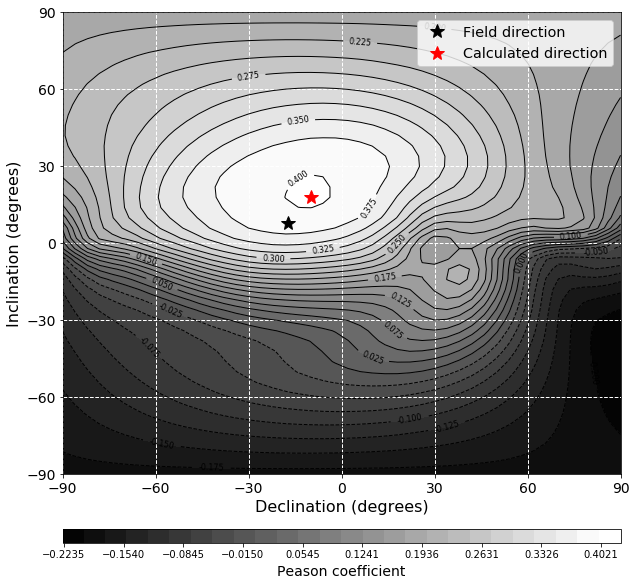

In [63]:
# Plotting the cross correlation results
pyplot.figure(figsize=(10, 10))
# Line contour
c1 = pyplot.contour(DEC, INC, RES, 25, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.clabel(c1, fontsize = 8)
# Map contour and colorbar
c2 = pyplot.contourf(DEC.reshape(shape2interp), INC.reshape(shape2interp), RES.reshape(shape2interp), 
                     25, vmin = ccmin, vmax = ccmax, cmap = pyplot.cm.gray)
cbar2 = pyplot.colorbar(c2, aspect = 40, fraction = 0.05, orientation = 'horizontal', pad = 0.1)
cbar2.set_label('Peason coefficient', fontsize = 14, rotation = 0, labelpad = 5)
cbar2.set_ticks(numpy.linspace(ccmin, ccmax, 10))
cbar2.set_clim(ccmin, ccmax)
# Plot configuration
pyplot.plot(decf, incf, 'k*', label = 'Field direction', markersize = 14)
pyplot.plot(pdmax, pimax, 'r*', label = 'Calculated direction', markersize = 14)
#pyplot.title('Distribution of cross-correlation coefficients', fontsize = 18)
pyplot.xlabel('Declination (degrees)', fontsize = 16)
pyplot.ylabel('Inclination (degrees)', fontsize = 16)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 14)
pyplot.legend(loc = 'best', fontsize = 'x-large')

pyplot.grid(color = 'w', linestyle = '--', linewidth = 1.)

#pyplot.savefig('figure07(a)-correlation.png', dpi = 600, transparent = True, bbox_inches = 'tight')
#pyplot.savefig('figure07(a)-correlation.pdf', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.show()

In [73]:
# Calculates the RTP data
Rtp = rtp_layer(datalayer, shape, EQL, shapel, 0.01, incf, decf, pimax, pdmax)

In [74]:
# Interpolate the RTP data for plotting:
xoplot, yoplot, = regular_grid((xo.min(), xo.max(), yo.min(), yo.max()), (250, 250))
Rtpi = griddata((yo, xo), Rtp.reshape(Rtp.size), (yoplot, xoplot), method = 'cubic')
plotx = xoplot.reshape(250, 250)
ploty = yoplot.reshape(250, 250)
plotz = Rtpi.reshape(250, 250)

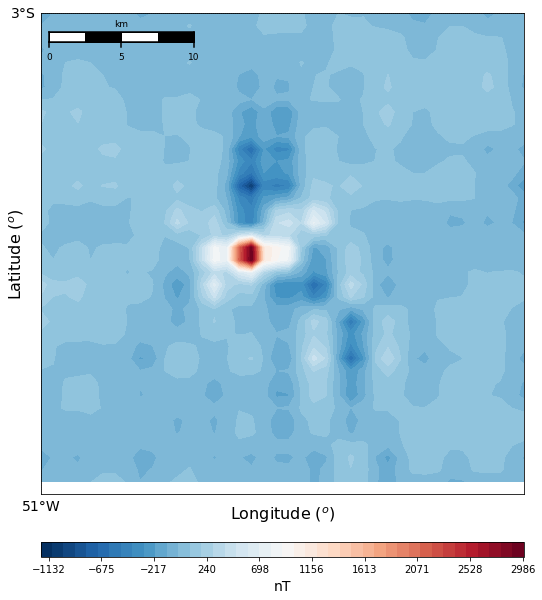

In [75]:
pyplot.figure(figsize=(10,10))
map3.drawmeridians(meridians2, labels=[1, 0, 0, 1], fontsize = 14)
map3.drawparallels(parallels2, labels=[1, 0, 0, 1], fontsize = 14)
map3.drawmapscale(-50.95, -3.015, newlong0.max(), newlati0.max(), 10, barstyle = 'fancy')
cs3 = map3.contourf(long0.reshape(shape), lati0.reshape(shape), Rtp, 50, 
                    cmap = pyplot.cm.RdBu_r, latlon = True, alpha = 1.)
cbar = map3.colorbar(cs3, location = 'bottom', size = '3%', pad = '10%')
cbar.set_label('nT', fontsize = 14, rotation = 0, labelpad = 5)
cbar.set_ticks(numpy.linspace(Rtp.min(), Rtp.max(), 10))
cbar.set_clim(Rtp.min(), Rtp.max())

#pyplot.suptitle('Reduced to Pole total field anomaly (nT)', fontsize = 19, y = 0.82)
pyplot.xlabel('Longitude $(^o)$', fontsize = 16, labelpad = 10)
pyplot.ylabel('Latitude $(^o)$', fontsize = 16, labelpad = 15)

pyplot.savefig('figure08-rtp.png', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.savefig('figure08-rtp.pdf', dpi = 600, transparent = True, bbox_inches = 'tight')
pyplot.show()

In [ ]:
# Plotting the result of rtp data
#pyplot.figure(figsize=(10,10))
#contourmap = pyplot.contourf(long0.reshape(shape), lati0.reshape(shape), 
#                             Rtp, 50, cmap = pyplot.cm.jet)
#contourmap = pyplot.contourf(plotx, ploty, plotz, 50, cmap = pyplot.cm.jet)
#cbar2 = pyplot.colorbar(contourmap, aspect = 40, fraction = 0.03, orientation = 'vertical')
#cbar2.set_label('$nT$', fontsize = 15, rotation = -90, labelpad = 20)
#cbar2.set_ticks(numpy.linspace(Rtp.min(), Rtp.max(), 10))
#cbar2.set_clim(Rtp.min(), Rtp.max())

#pyplot.title('Reduced to Pole total field anomaly (nT)', fontsize = 18)
#pyplot.xlabel('East coordinate (meters)', fontsize = 16, labelpad = 10)
#pyplot.ylabel('North coordinate (meters)', fontsize = 16, labelpad = 10)
#pyplot.xticks(numpy.linspace(Xo.min(), Xo.max(), 3), fontsize = 14)
#pyplot.yticks(numpy.linspace(Yo.min(), Yo.max(), 3), fontsize = 14)

#pyplot.savefig('figure08-rtp.png', dpi = 600, transparence = True, bbox_inches = 'tight')
#pyplot.savefig('figure08-rtp.pdf', dpi = 600, transparence = True, bbox_inches = 'tight')
#pyplot.show()